In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sys
import os

sys.path.append(os.path.abspath('../scripts'))
from processed import *

import warnings
warnings.filterwarnings('ignore')

palette = sns.color_palette(["#003959","#f46d43", "#106290", "#fdae61",  "#33a7e7", "#fee08b"])
sns.set_palette(sns.color_palette(palette))
sns.color_palette(palette)

[(0.0, 0.2235294117647059, 0.34901960784313724),
 (0.9568627450980393, 0.42745098039215684, 0.2627450980392157),
 (0.06274509803921569, 0.3843137254901961, 0.5647058823529412),
 (0.9921568627450981, 0.6823529411764706, 0.3803921568627451),
 (0.2, 0.6549019607843137, 0.9058823529411765),
 (0.996078431372549, 0.8784313725490196, 0.5450980392156862)]

- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]

In [12]:
df = pd.read_csv('../data/raw/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Age: Average of approximately 53.5 years, ranging from 28 to 77 years.

RestingBP: Average of 132.4, but with minimum values at zero, indicating inconsistencies.

Cholesterol: Average of 198.8, with values ranging from 0 to 603, which suggests anomalous values (cholesterol of 0 is unusual).

FastingBS: 23.3% of patients have elevated blood glucose levels (FastingBS = 1).

MaxHR: Average of 136.8 with a minimum of 60 and a maximum of 202.

Oldpeak: Ranges from -2.6 to 6.2, which is interesting and suggests a deeper analysis, as negative values can be rare.

HeartDisease: The average of 0.55 indicates that around 55% of patients have a diagnosis of heart disease.

In [13]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Let’s address the inconsistent values in RestingBP and Cholesterol by replacing the zero values with the median

In [15]:
median_restingbp = df['RestingBP'].median()
median_cholesterol = df['Cholesterol'].median()

df['RestingBP'] = df['RestingBP'].replace(0, median_restingbp)
df['Cholesterol'] = df['Cholesterol'].replace(0, median_cholesterol)

In [16]:
columns_numeric = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
columns_categoric = ['FastingBS', 'Sex', 'ChestPainType', 'RestingECG', 'ST_Slope', 'ExerciseAngina', 'HeartDisease']

- Numerical Features : Age, RestingBP, Cholesterol, MaxHR, Oldpeak
- Categorical Features : Sex, ChestPainType, FastingBS, RestingECG, ExerciseAngina, ST_Slope, HeartDisease

Histogram plot is a graph used to visualize the distribution of a dataset. It shows the frequency or the number of occurrences of different values within a continuous set of data. The histogram is employed to identify patterns, trends, and insights in the data, making it useful in areas such as statistics, data analysis, and engineering. It assists in identifying the shape of the distribution, detecting outliers, data segmentation, trend analysis, performance evaluation, and making informed decisions.

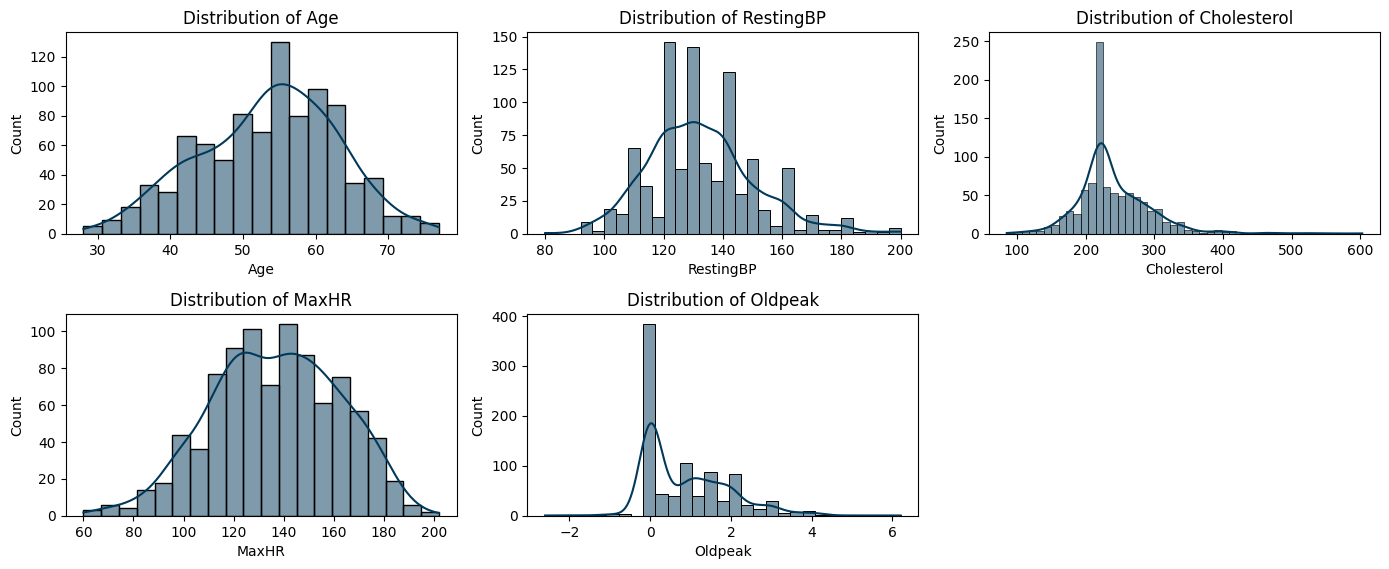

In [17]:
fig, axes = plt.subplots(4, 3, figsize=(14, 11))
titles = ['Distribution of ' + col for col in columns_numeric]
for i, col in enumerate(columns_numeric):
    sns.histplot(x=df[col], kde=True, ax=axes[i // 3, i % 3]).set(title=titles[i])
for j in range(i + 1, len(axes.flat)):
    fig.delaxes(axes.flat[j])
plt.tight_layout()
plt.show()

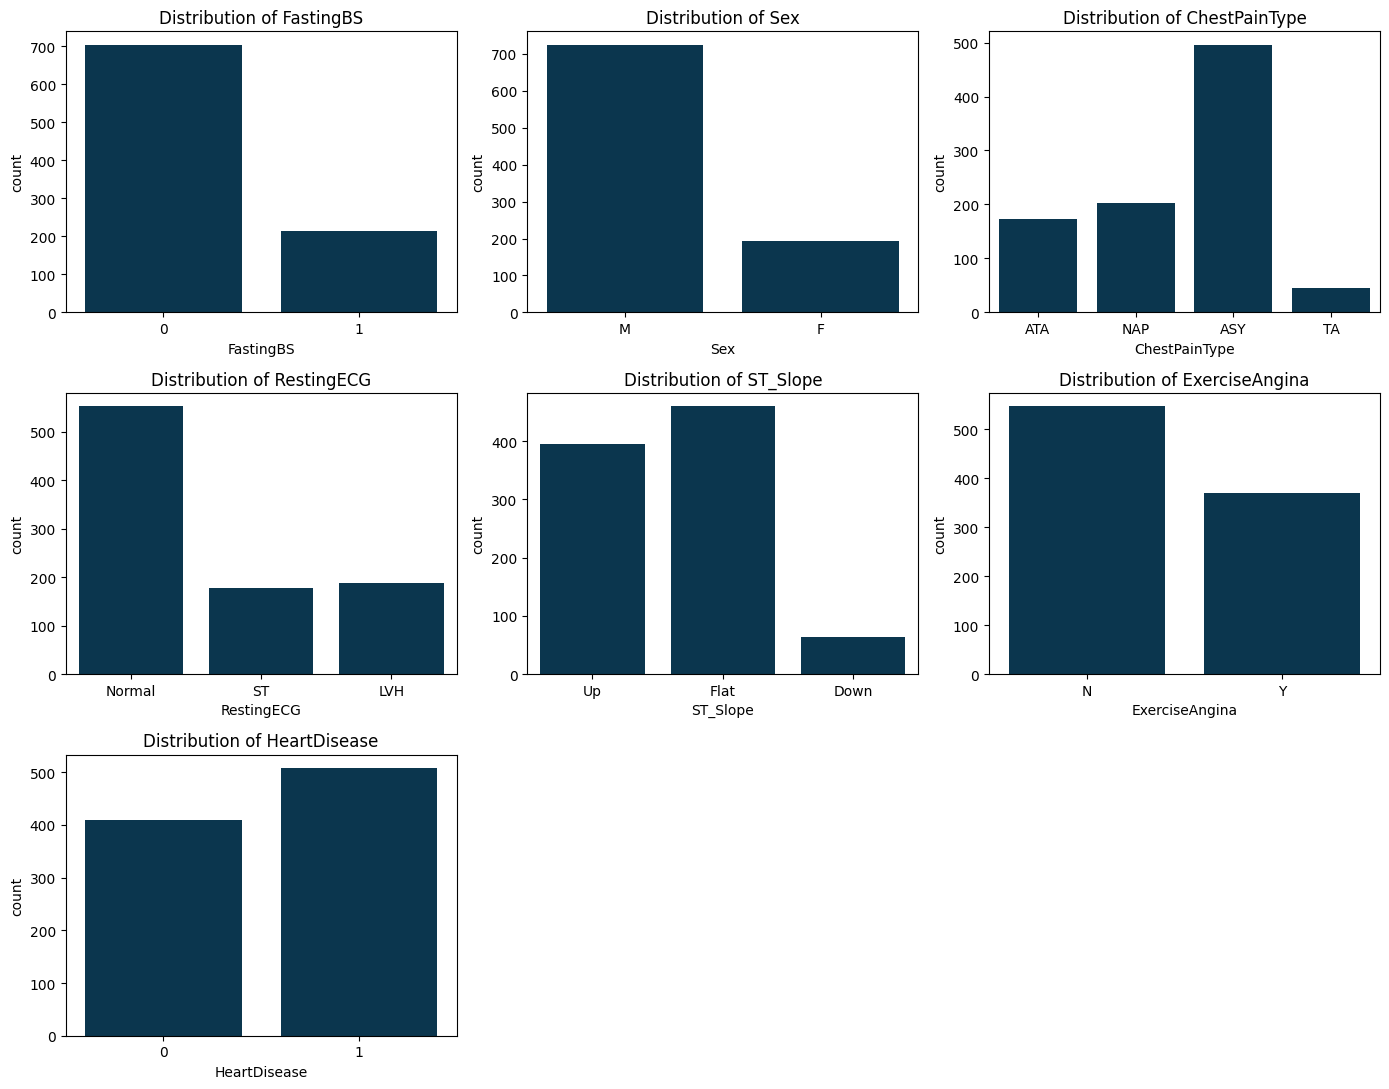

In [18]:
fig, axes = plt.subplots(3, 3, figsize=(14, 11))
titles = ['Distribution of ' + col for col in columns_categoric]
for i, col in enumerate(columns_categoric):
    sns.countplot(x=df[col], ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set(title=titles[i])
for j in range(i + 1, len(axes.flat)):
    fig.delaxes(axes.flat[j])
plt.tight_layout()
plt.show()

Age: Patients with heart disease tend to be older, indicating that the risk of developing the condition increases with age.

Resting Blood Pressure: Elevated blood pressure levels are often observed in patients with heart disease, pointing to an association with increased cardiovascular risk.

Cholesterol: Patients with heart disease have, on average, higher cholesterol levels, suggesting that hypercholesterolemia is a significant risk factor for this condition.

Maximum Heart Rate: On average, maximum heart rate (MaxHR) is lower in patients with heart disease, which may indicate reduced cardiac capacity.

Oldpeak: Elevated Oldpeak values in patients with heart disease reflect a higher level of cardiac stress, which is associated with a higher cardiovascular risk.

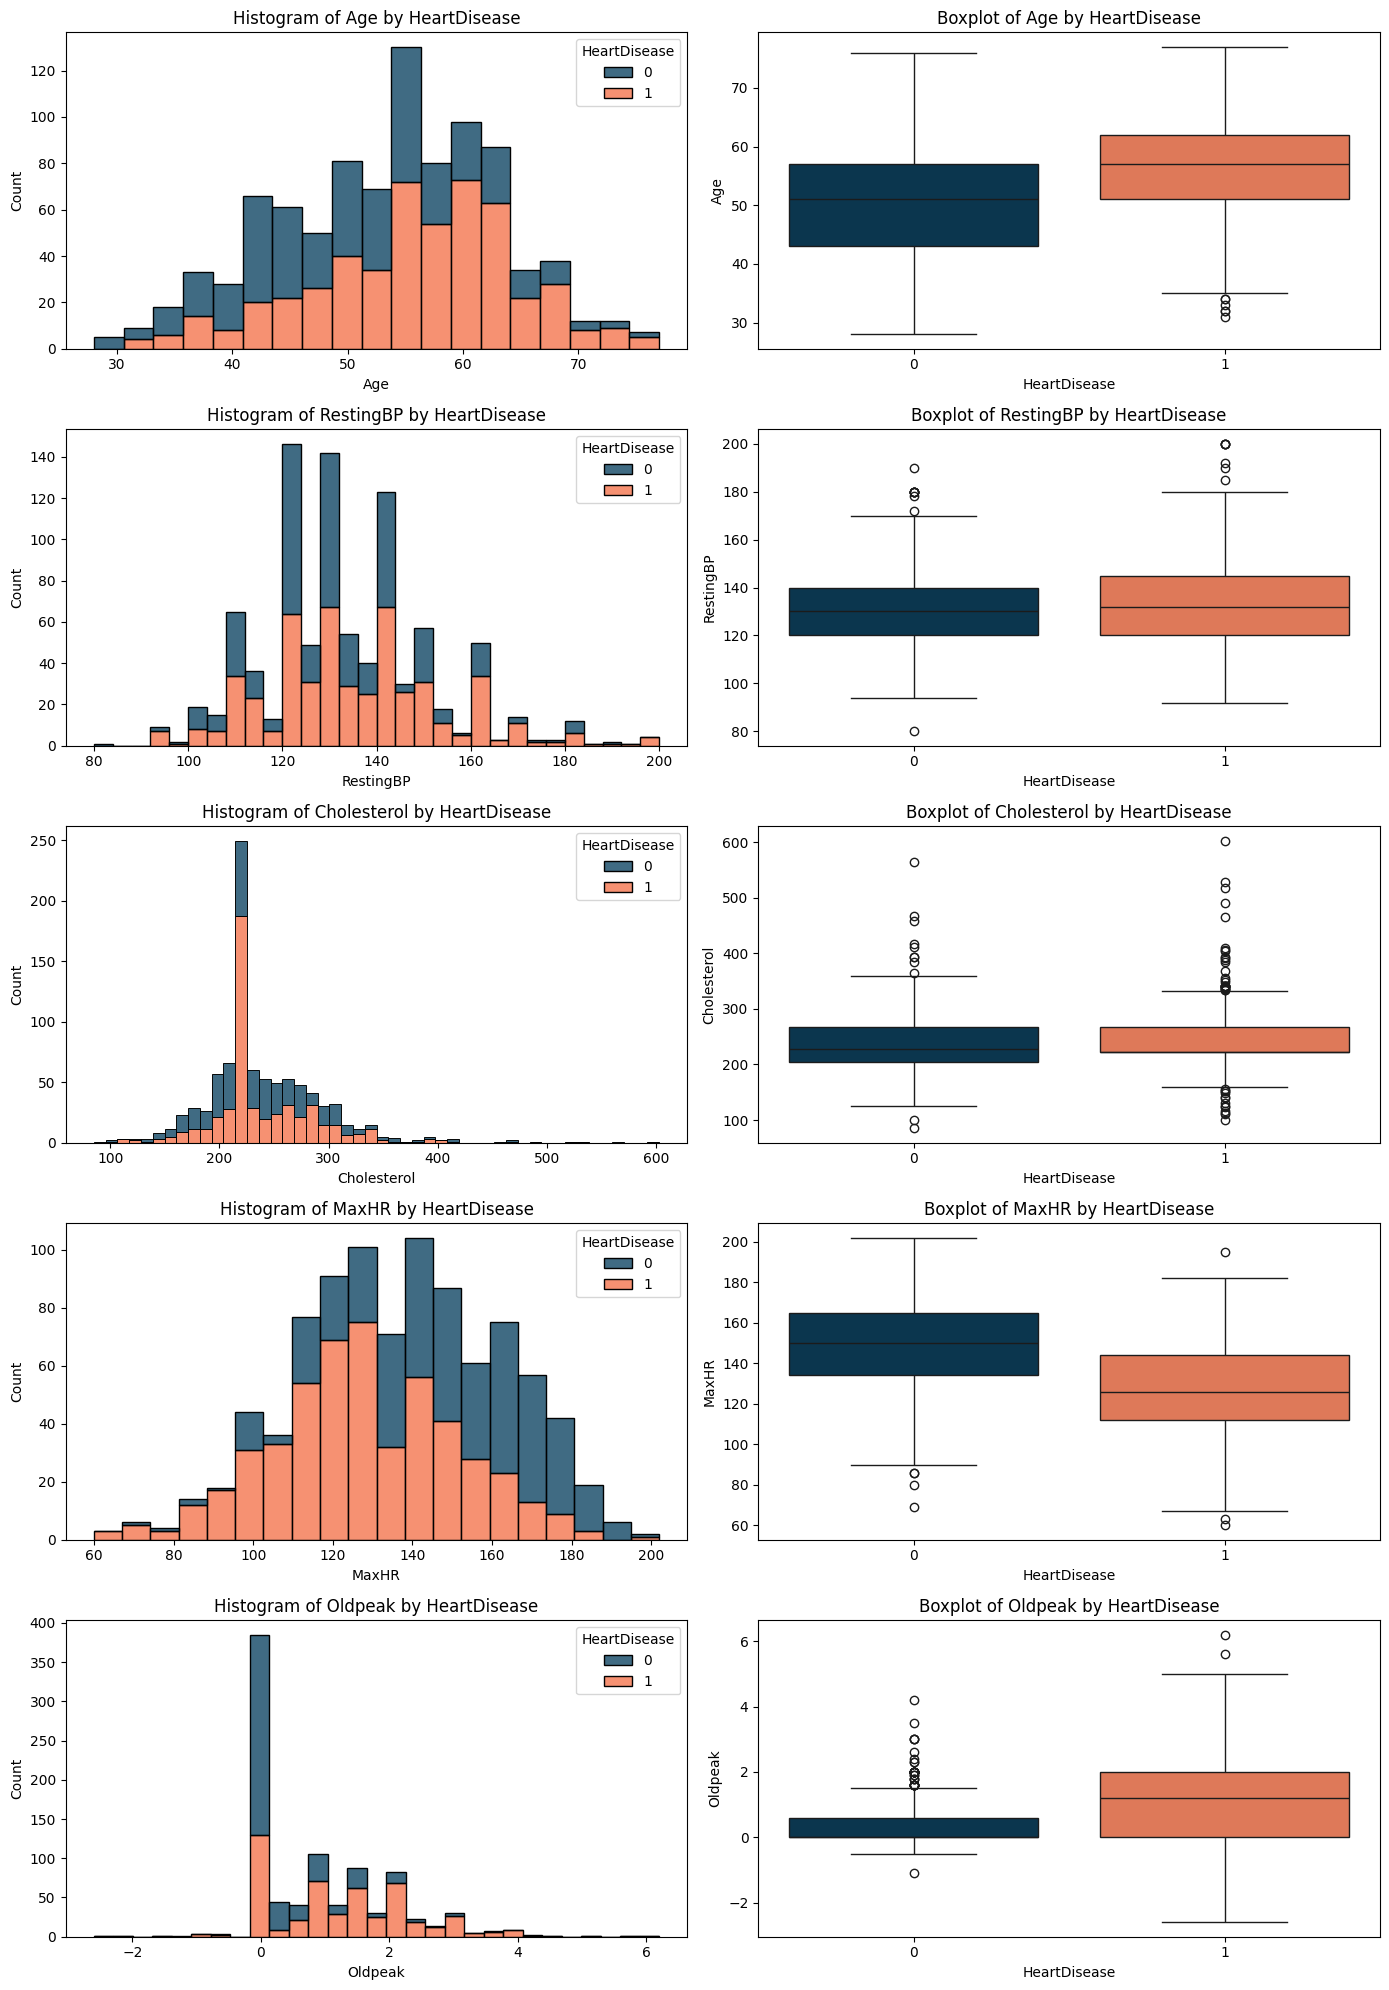

In [19]:
fig, axes = plt.subplots(len(columns_numeric), 2, figsize=(14, len(columns_numeric) * 4))
for i, col in enumerate(columns_numeric):
    sns.histplot(data=df, x=col, hue='HeartDisease', multiple='stack', ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {col} by HeartDisease')
    sns.boxplot(data=df, x='HeartDisease', y=col, ax=axes[i, 1], palette=palette)
    axes[i, 1].set_title(f'Boxplot of {col} by HeartDisease')
plt.tight_layout()
plt.show()

FastingBS: indicates high blood sugar levels, associated with increased cardiac risk.

Sex: Predominantly male, with a generally higher incidence of heart disease in men.

ChestPainType: ASY (asymptomatic) is the most common, followed by NAP, ATA, and TA. Asymptomatic individuals have a higher prevalence of heart disease, while less severe anginas present a lower risk.

RestingECG: Most patients have a normal ECG, followed by ST and LVH. Variations in the ECG, such as left ventricular hypertrophy, may indicate increased risk.

Exercise Angina: Patients with exercise-induced angina tend to present more cases of heart disease.

ST_Slope: The ST slope also provides insights, with Flat associated with higher risk.

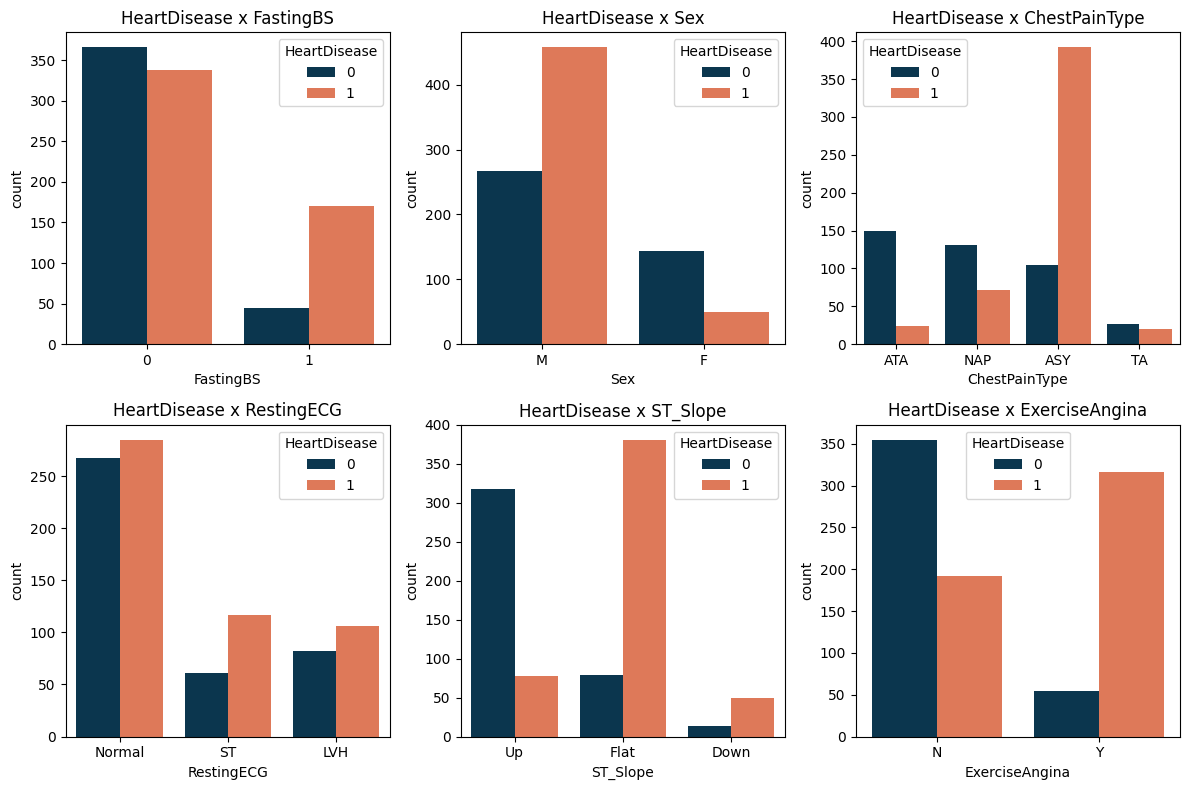

In [20]:
columns_c = [col for col in columns_categoric if col != 'HeartDisease']
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
titles = ['HeartDisease x ' + col for col in columns_c]
for i, col in enumerate(columns_c):
    sns.countplot(data=df, x=col, hue='HeartDisease', ax=axes[i // 3, i % 3]).set_title(titles[i])
plt.tight_layout()
plt.show()

In [21]:
df = encode_features(df, ['Sex', 'ChestPainType', 'RestingECG', 'ST_Slope', 'ExerciseAngina'])

A correlation matrix is a table that shows the relationship between different variables in a dataset. It helps to identify whether the variables move together, in opposite directions, or have no relationship with each other. The values in the matrix range from -1 to 1, where 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation. It is a useful tool for understanding patterns and trends in the data.

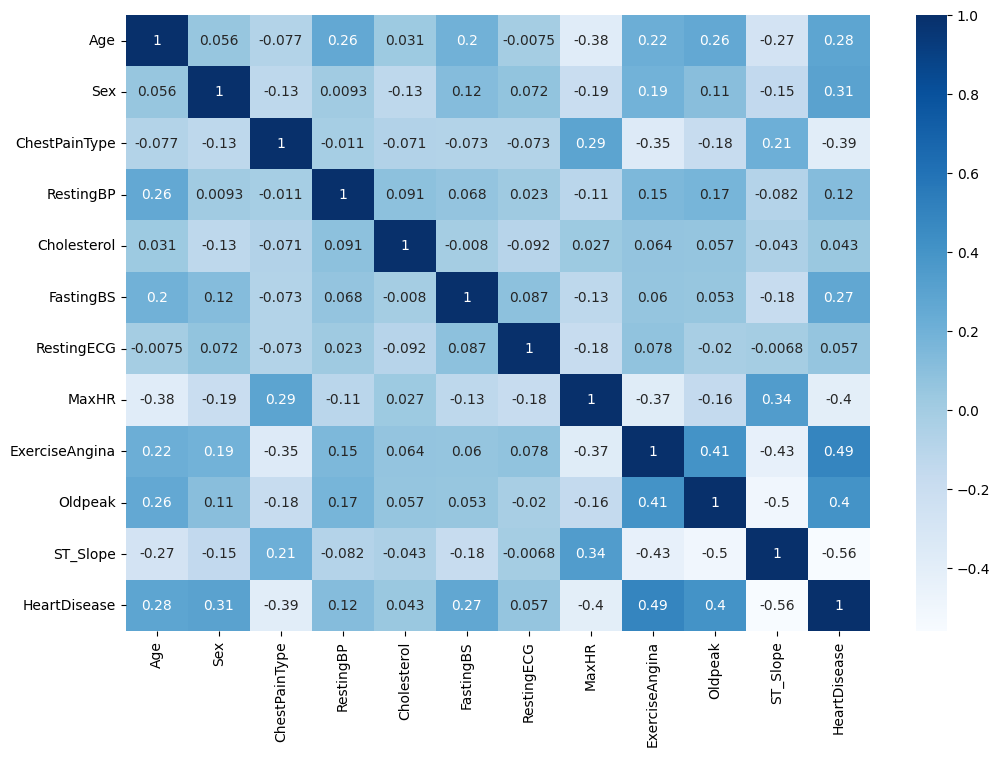

In [23]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()

In [22]:
data_processed = "../data/processed/heart_processed.csv"
df.to_csv(data_processed, index=False, encoding="utf-8")